# Abstract/ Objective 

Maximizing the number of items on trailers represents a potential reduction in operating expenses for companies that ship goods.  It also represents a potential reduction in environmental impact as the amount of fuel per unit shipped may be reduced.  There are a number of factors that prevent companies from fully-loading trailers.  Among them are customer demand, weight of the items, labor costs, and labor shortages.  The following series of logical premises and equations are designed to help companies fully utilize trailers without sacrificing customer expectations.

# The Business Problem

Imagine the following scenario:  There is a company that ships goods.  In order to fulfill customer expectations, some items shipped need to be sent out on the earliest available trailer (a.k.a. "high-priority-items").  Other items need to be shipped in two to three days in order to meet customer expectations (a.k.a. "middle-priority-items").  And some need to be shipped in four or more days in order to meet customer expectations (a.k.a. "low-priority-items").  If one sends only the high-priority-items, the trailer will not be fully loaded.  If instead one sends all of the items, one will need more than one trailer and the second trailer will not be fully-loaded.  Moreover, there is no easy way to determine what is or isn't a 'high-priority-item' once it has been sent to the trailer to be loaded.  Ideally, one wants to send out 10 to 11 fully-loaded trailers per week to this destination as opposed to 14 trailers per week, 7 of which are only partially-loaded. 

One option to solve this problem is to program a calculator-like object to solve it.  This can be done through the programming language Python.  The first task one needs to complete is to define "What is a fully loaded trailer?".  Depending on what one is shipping and the methodology used to ship those items, this number can vary.   If one is shipping lighter items and is double-stacking pallets in a standard 53' trailer, that number is 60 pallets.  If one is instead using a fork-lift to fully-load a 53' trailer with single-stacked pallets, that number is 30 pallets.  If one is instead using a pallet jack to "straight-load" a 53' trailer with single-stacked pallets, that number is 24.  There are also other factors that can come into play such as non-standard pallets and trailers shorter than 53 feet such as box trucks. However, if one has a standardized way of shipping items to a destination, one can use that standard to define "fully-loaded-trailer".  

In addition to knowing how many pallets can fit, it is useful to know how many units typically fit into a trailer for a particular destination considering some destinations may typically receive larger units and other destinations may typically receive smaller units.  In the real world, such numbers can be obtained from a warehouse's past shipment history.  In this notebook, random number generators will be used as substitute.

## The Data

This is designed to be a simulation using random number generators to demonstrate a logical and mathematical framework real companies can use to help improve the fuel-efficiency of their logistical operations.  All data is fake, although it is designed to closely represent real-world scenarios.

In [35]:
# Random number generators are being used to create values for three different destinations, namely 
# Washington, DC, Boston, MA, and Charleston, WV.  The originating warehouse is in Pittsburgh, PA.
# The variables named "100d-60p" represent the past 100 days of fully-loaded trailers sent to 
# a destination. 60p stands for 60 pallets as these hypothetical destinations all use trailers that 
# can fit 60 pallets.  This variable will be used to estimate how many units will be expected to fit
# in a trailer. The second variable, past_100d_units, represents the number of units ordered by 
# customers from a particular destination that need to be shipped from the Pittsburgh warehouse.  
# One objective of this notebook will be to try and use priority shipping to make the two 
# numbers match.


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random
 
random.seed(3)


"Loads departing from Pittsburgh, PA"

"Washington, DC" 

DC_units_in_loads_with_60p_for_past100day = np.random.normal(loc=12500, scale= 1500, size =(1,100)).round().tolist()

dc_100d_60p = DC_units_in_loads_with_60p_for_past100day[0]

dc_units_for_past_100_days = np.random.normal(loc=17000, scale= 3000, size =(1,100)).round().tolist()
dc_past_100d_units = dc_units_for_past_100_days[0]

"Boston, Mass"
Boston_units_in_loads_with_60p_for_past100day = np.random.normal(loc=10250, scale=1000, size=(1, 100)).round().tolist()
Boston_100d_60p= Boston_units_in_loads_with_60p_for_past100day[0]

Boston_units_for_past_100_days = np.random.normal(loc=14250, scale= 2500, size=(1, 100)).round().tolist()
Boston_past_100d_units =Boston_units_for_past_100_days[0]

"Charleston, WV:" 
WV_units_in_loads_with_60p_for_past100d = "None"

WV_units_for_past_100_days = np.random.normal(loc=5300, scale= 1000, size=(1, 100)).round().tolist()
WV_past_100d_units = WV_units_for_past_100_days[0]

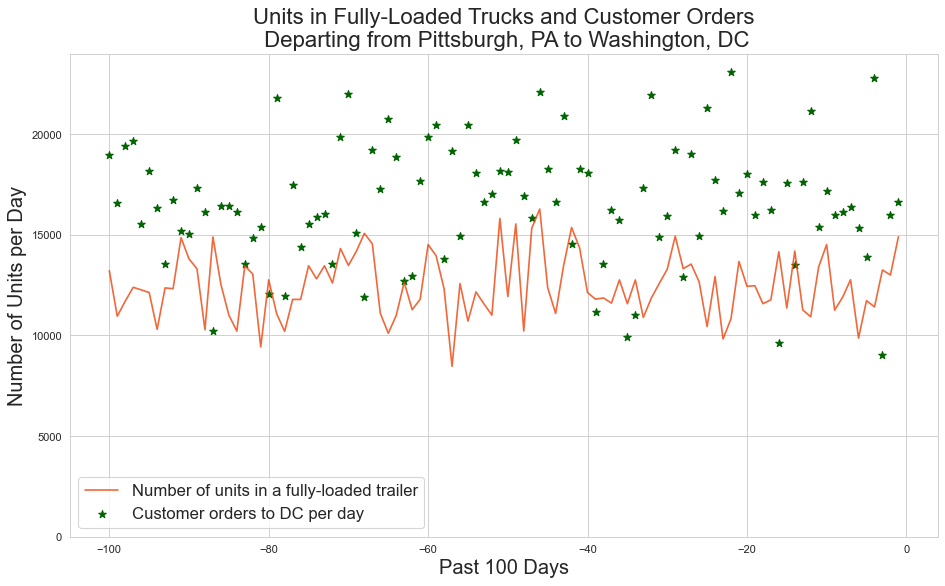

In [34]:
# This is a graphical representation of the DC destination.  The green stars represent the number of
# units that were ordered on a particular day and the red line represents the number of units 
# that were able to fit on the trailer for that particular day.  As can be seen by the number of 
# green dots above the red line, on most days more than one trailer needs to be used to send 
# out everything that is ordered on a particular day, but on a few days only one trailer is needed.
# Moreover, the second trailer is unlikely to be fully-loaded when it is used. 

fig, ax = plt.subplots(figsize=(14,8), dpi=80)
X = np.arange(-100, 0)

ax.plot(X, dc_100d_60p, c='#ef4209', alpha=0.8, label="Number of units in a fully-loaded trailer")
ax.scatter(X, dc_past_100d_units, c='darkgreen', marker='*', s=50, label="Customer orders to DC per day");
ax.set_ylim(0, 24000);
ax.grid(True)

plt.title("Units in Fully-Loaded Trucks and Customer Orders\n Departing from Pittsburgh, PA to Washington, DC", fontsize=20)
plt.xlabel('Past 100 Days', fontsize=18)
plt.ylabel('Number of Units per Day', fontsize=18);
plt.legend(fontsize=15)
plt.show()

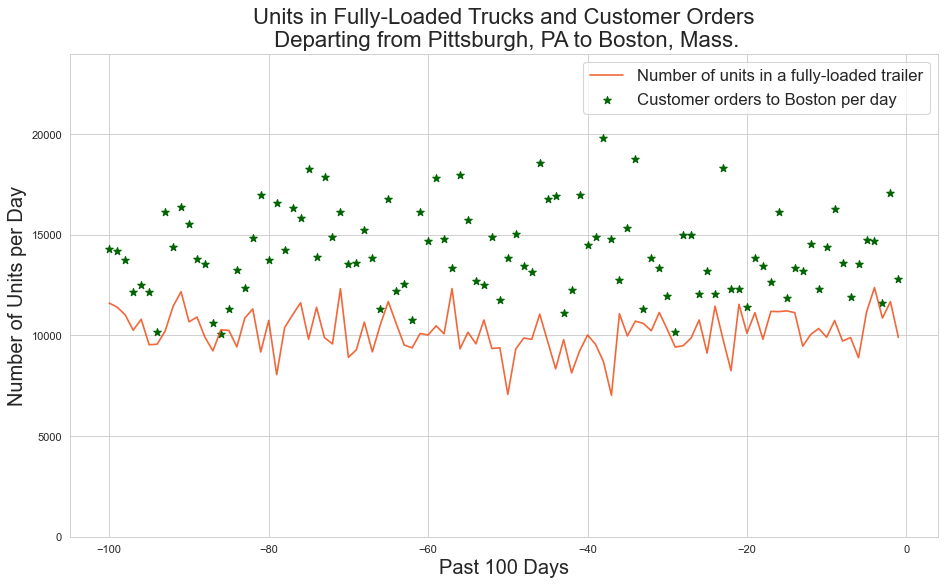

In [36]:
# A similar situation occurs with the Boston destination. 

fig, ax = plt.subplots(figsize=(14,8), dpi=80)

ax.plot(X, Boston_100d_60p, c='#ef4209', alpha=0.8, label="Number of units in a fully-loaded trailer")
ax.scatter(X, Boston_past_100d_units, c='darkgreen', marker='*', s=50, label="Customer orders to Boston per day");
ax.set_ylim(0, 24000);
ax.grid(True)

plt.title("Units in Fully-Loaded Trucks and Customer Orders\n Departing from Pittsburgh, PA to Boston, Mass.", fontsize=20)
plt.xlabel('Past 100 Days', fontsize=18)
plt.ylabel('Number of Units per Day', fontsize=18);
plt.legend(fontsize=15)
plt.show()

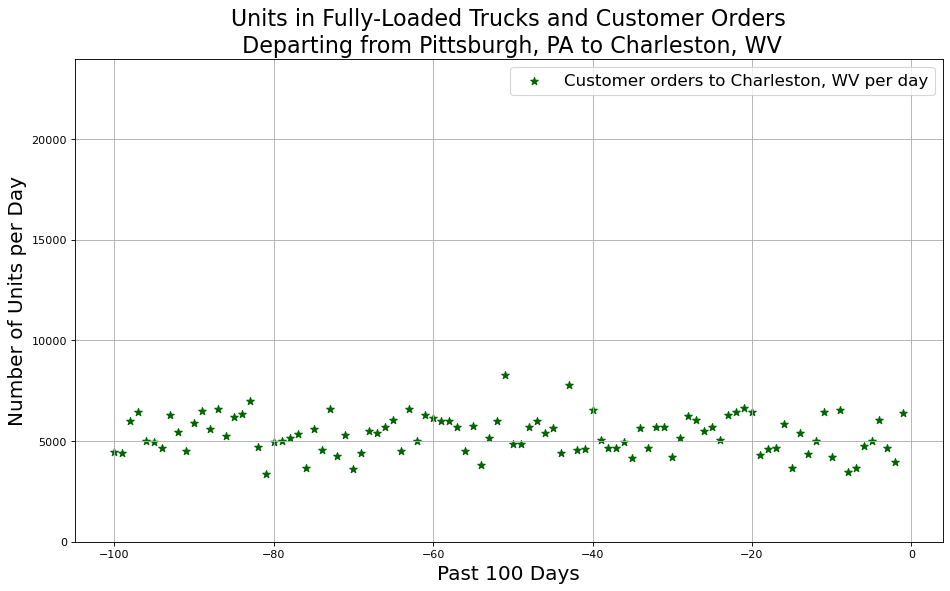

In [4]:
# In the case of Charleston, WV, the number of customer orders never exceeds the number of units a trailer
# can fit so one trailer is always sufficient.  

fig, ax = plt.subplots(figsize=(14,8), dpi=80)

ax.scatter(X, WV_units_for_past_100_days, c='darkgreen', marker='*', s=50, label="Customer orders to Charleston, WV per day");
ax.set_ylim(0, 24000);
ax.grid(True)

plt.title("Units in Fully-Loaded Trucks and Customer Orders\n Departing from Pittsburgh, PA to Charleston, WV", fontsize=20)
plt.xlabel('Past 100 Days', fontsize=18)
plt.ylabel('Number of Units per Day', fontsize=18);
plt.legend(fontsize=15)
plt.show()

C:\Users\eincr\AppData\Local\Temp/ipykernel_56512/843489692.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


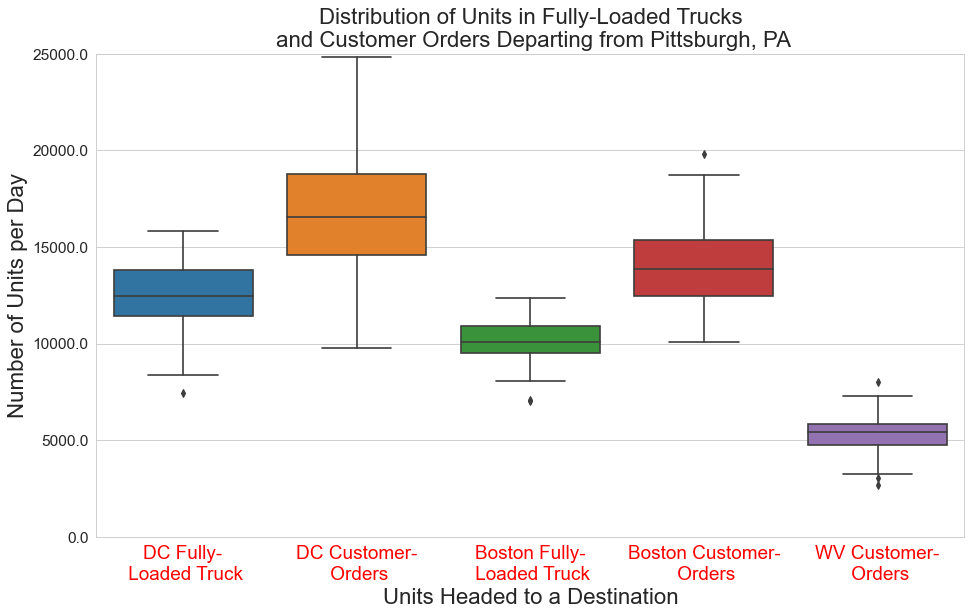

In [37]:
#  This is a box-and-whisker plot that represents the same thing in a slightly different way.
#  For the Boston and DC destinations, the average number of customer orders per day 
#  usually exceeds the number of units a trailer can fit, but not always as there is significant
#  variation in both the number of units that are ordered and the number of units that can fit
#  into a trailer.  If one doesn't have a logical framework to deal with the aforementioned 
#  variations, it will result in logistical issues such as as underutilized trailers or customers
#  not getting their products on time.  


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(14,8), dpi=80)
data = (dc_100d_60p, dc_past_100d_units, Boston_100d_60p, Boston_units_for_past_100_days, WV_units_for_past_100_days)
boxplot = sns.boxplot(data = data)
plt.xlabel("Units Headed to a Destination", size=20)
plt.ylabel('Number of Units per Day', size=20)
plt.title("Distribution of Units in Fully-Loaded Trucks\n and Customer Orders Departing from Pittsburgh, PA", size=20)
ax.set_ylim(0, 25000)
ax.set_xticklabels(['DC Fully-\n Loaded Truck', 'DC Customer-\n Orders', 'Boston Fully-\n Loaded Truck',
                    'Boston Customer-\n Orders', 'WV Customer-\n Orders'], fontsize=17, color='r')
ax.set_yticklabels(ax.get_yticks(), fontsize=14)
sns.set_style("whitegrid");

## Fully-Utilize Trailers Using Statistical Updating and Priority Shipping

In order to fully-utilize outbound trailers, there are two primary problems one must solve.  The first is determining how many units can fit into a trailer and not sending more units than the trailer can fit.  This is more difficult than it sounds.  If one uses the average number of units a trailer can fit, then roughly half the time one will exceed trailer capacity as it is the "average".  Exceeding trailer capacity could mean customers not getting their packages on time which, in turn, may necessitate the need for an additional trailer.  If instead one goes well below the average to play it safe, then one won't be filling trailers to the fullest extent possible.  

The second problem one must solve is determining how many trailers are needed to meet customer demand. This is also a difficult problem to solve as some of the customer demand is not known until the day it is supposed to be shipped, hence it is challenging to know how many trucks to schedule.  Poor planning may result in under-utilized trailers as it takes time to fully load an additional trailer and a warehouse may be forced to send a half-empty trailer due to not having enough labor to fully load it.

This notebook provides solutions to both problems.  The first solution involves using the number of loaded pallets to provide a real-time update on how many units can fit into a trailer.  The second solution uses priority shipping to adjust how many trailers to schedule.


## Statistical Updating 

As mentioned earlier, trying to predetermine how many units can fit into a fully-loaded trailer is imprecise as there is a lot of space to fill which can lead to a wide range of possible outcomes.  It is far more accurate to make ones estimates off of a half-filled or a three-quarter filled trailer as there is less space to fill and consequently a smaller range of possible outcomes.  In the case of standardized trailers being completely filled with pallets of a standardized size (which is commonplace in the industry), one can use the known number of pallets that can fit into a trailer to update one’s estimates.  The proposed methodology is as follows:
1.  Use a warehouse's past shipment history to provide an estimate for the minimum number of units expected to fit into a fully-loaded trailer. For example, one can look for all trailers that have 60 pallets in them and find the number of units that is -3 standard deviations away from the mean of said trailers.  This is intentionally a low-ball estimate and will be used as the initial planned volume.   
2.  Divide the minimum number of units expected to fit into a fully-loaded trailer by the number of pallets that fit in said trailers (60 in the above example).  This number enables one to determine how may units are expected to fit onto a pallet.
3.  Subtract the total number of pallets a trailer can fit by the number of loaded (or created) pallets to provide an updated number of remaining pallets.   
4.  Multiply the number of remaining pallets by the minimum number of units expected to fit on a pallet to provide an updated estimate of what can fit.  

All of this may seem quite overwhelming, but it is actually quite simple if one works in a warehouse that electronically keeps track of all this information.  All one needs to do is plug in a couple of numbers and one can get an accurate updated estimate of how many units are expected to fit.   As one is using a low-ball estimate, the risk of going over capacity is minimal.  And as one is updating ones estimates as one loads pallets, the risk of going to low is also minimal as the forecasts will become more accurate the closer one gets to having a fully-loaded trailer.

I have created two calculator-like objects to demonstrate the aforementioned approach.  They are fully operational.  If one wishes to use this approach, just substitute actual warehouse data with the fake data I am using.  The first set of functions updates one’s estimate based off of loaded pallets.   The second set of functions adds created pallets and sent units into the equation.  

A note on the statistics:  
I calculated level of risk based off of standard deviations and assumed that the number of units that can fit into a fully-loaded trailer is normally distributed.  In a normal distribution, 68.2% of values fall within 1 standard deviation of the mean, 95.4% of values fall within 2 standard deviations, and 99.7% fall within 3 standard deviations. Thus, if one wants to have less than .3% level of risk of going beyond trailer capacity, one can set the level of risk to -3 standard deviations and plan on sending the number of units that corresponds to that level of risk.   Alternatively, one could incorporate other statistical approaches such as z-scores and percentiles.


In [38]:
# These functions enable one to use past warehouse data, the known number of 
# pallets that can fit into a trailer, and the number of pallets that have been 
# loaded to provide an updated capacity estimate.  Try it out (if you are using
# this in a Jupyter notebook).  This is simple code and could be put on a website
# anyone can use or incorporated into a company's employee website.


max_number_of_pallets = []  
level_of_risk = []  
loaded_pallets = [] 
cont = 'y'

def min_expected_items(destination):
    return (np.mean(destination) - (level_of_risk)*(np.std(destination)))

def min_expected_items_per_pallet(destination):
    return min_expected_items(destination)/(max_number_of_pallets)

def number_of_remaining_pallets(loaded_pallets):
    return (max_number_of_pallets - loaded_pallets)
    
def estimate_for_remaining_units(destination): 
    return (min_expected_items_per_pallet(destination))*(number_of_remaining_pallets(loaded_pallets))    

print('Please select operation' \
        ' 1. DC ' \
        ' 2. Boston ')

while cont == 'y':      
    
    select = input('Select operations from 1, 2: ')
    max_number_of_pallets = int(input('Enter number of pallets in a fully loaded trailer: '))
    level_of_risk = int(input('Enter level of risk measured in standard deviations: '))
    loaded_pallets = int(input('Enter number of loaded pallets: '))

    if select == '1':
        print('Capacity estimate for the remaining units to DC is', estimate_for_remaining_units(dc_100d_60p))
    elif select == '2':
        print('Capacity estimate for the remaining units to Boston is', estimate_for_remaining_units(Boston_100d_60p))
    else:
        print('Invalid input')
    cont = input('Continue? y/n:') 
    if cont == 'n':
         break

Please select operation 1. DC  2. Boston 
Select operations from 1, 2: 1
Enter number of pallets in a fully loaded trailer: 60
Enter level of risk measured in standard deviations: 3
Enter number of loaded pallets: 30
Capacity estimate for the remaining units to DC is 3670.2912000160914
Continue? y/n:n


In [7]:
# These set of functions are similar to the ones above, only this time we 
# are subtracting the number of created pallets and the number of sent units
# from the total capacity as created pallets and sent units will have to go
# onto a trailer.  As the sent units get added to the already created 
# pallets and loaded, the forecast will become more accurate by removing
# sent units and created pallets from the calculation.  

max_number_of_pallets = []  
level_of_risk = [] 
loaded_pallets = []
created_pallets = []
sent_units = []
cont = 'y'

def remaining_pallets_minus_created(created_pallets):
    return (number_of_remaining_pallets(loaded_pallets) - created_pallets)
def remaining_units_minus_sent(destination):
    return (((min_expected_items_per_pallet(destination))*(remaining_pallets_minus_created(created_pallets))- sent_units))
 
            
print('Please select operation' \
        ' 1. DC ' \
        ' 2. Boston ')  

while cont == 'y':      
    
    select = input('Select operations from 1, 2: ')
    max_number_of_pallets = int(input('Enter number of pallets in a fully loaded trailer: '))
    level_of_risk = int(input('Enter level of risk measured in standard deviations: '))
    loaded_pallets = int(input('Enter number of loaded pallets: '))
    created_pallets = int(input('Enter number of created pallets: '))
    sent_units = int(input('Enter number of sent units: '))

    if select == '1':
        print('Capacity estimate for the remaining units to DC is', remaining_units_minus_sent(dc_100d_60p_round))
    elif select == '2':
        print('Capacity estimate for the remaining units to Boston is', remaining_units_minus_sent(Boston_100d_60p_round))
    else:
        print('Invalid input')
    cont = input('Continue? y/n:') 
    if cont == 'n':
         break

Please select operation 1. DC  2. Boston 
Select operations from 1, 2: 1
Enter number of pallets in a fully loaded trailer: 60
Enter level of risk measured in standard deviations: 3
Enter number of loaded pallets: 35
Enter number of created pallets: 2
Enter number of sent units: 500
Capacity estimate for the remaining units to DC is 2331.2077611379996
Continue? y/n:n


## Priority Shipping

If everything that was ordered had to be shipped the same day it was ordered, there would be no way to maximize the utilization of trailers that ship customer orders.  But, as anyone who has had something upgraded to UPS 2-day or who has an Amazon Prime membership knows, there are different tiers of priority shipping.  The following code takes advantage of those tiers to calculate how many trailers are needed.  The same random number generators used to create the past 100-day warehouse histories are used to create the next 14 days of customer orders and fully-loaded trailers.  Customer orders are divided by one-third to create the priority shipments.  One-third of orders are high-priority, one-third is middle-priority, and one-third is low-priority.  High-priority items are always sent, and if a unit of lower priority isn't sent, then it gets upgraded to the next tier.  

While the present formulation differs significantly from a real-world scenario, this demonstration should provide some insight into the potential for fuel and cost savings through the use of priority shipping.  Some variation of this is likely already in place in warehouses that ship customer orders, but as such code is proprietary (and based on proprietary data), there cannot be an open-source academic discussion about how to best achieve fully-loaded outbound trailers, hence the need for a proxy. 

This demonstration is set up in two parts.  The first section determines how many trailers have to be sent if everything that was ordered was sent the same day it was ordered.  The second section predicts how many trailers how many trailers need to be sent based off of past historical trends and orders the warehouse already knows need to be sent. 

In [45]:
# This section creates the next 14 days of customer orders and the number of units
# that can fit into a trailer using the same random number generators as before.  

random.seed(3)

"Washington, DC" 
dc_cust_for_next_14_days = np.random.normal(loc=17000, scale= 3000, size =(1,14)).round().tolist()
dc_cust_next14 = dc_cust_for_next_14_days[0]

dc_60p_for_next_14_days = np.random.normal(loc=12500, scale= 1500, size =(1,28)).round().tolist()
dc_60p_next14 = dc_60p_for_next_14_days[0]

"Boston, Mass"
Boston_cust_for_next_14_days = np.random.normal(loc=14250, scale= 2500, size=(1, 14)).round().tolist()
Boston_cust_next14 = Boston_cust_for_next_14_days[0]

Boston_60p_for_next_14_days = np.random.normal(loc=10250, scale=1000, size=(1, 28)).round().tolist()
Boston_60p_next14 = Boston_60p_for_next_14_days[0]

### Number of trailers needed if priority shipping isn't used to fully-utilize trailers.

In [9]:
# This code adds one trailer for each day the number of units ordered by customers
# exceeds the number of units that can fit into the trailer for that day.  It is assumed that 
# at no point three trailers will be needed.

compare_list = [sum(x > y for x,y in zip(dc_cust_next14, dc_60p_next14))] + [len(dc_cust_next14)]

number_trucks = sum(compare_list) 
print (f"{number_trucks} trucks are needed if DC loads are not merged.")

compare_list2 =  [sum(x > y for x,y in zip(Boston_cust_next14, Boston_60p_next14))] + [len(Boston_cust_next14)]
number_trucks2 = sum(compare_list2)
print (f"{number_trucks2} trucks are needed if Boston loads are not merged.")

28 trucks are needed if DC loads are not merged.
26 trucks are needed if Boston loads are not merged.


### Predicting the number of trailers needed based off of past warehouse history and priority shipping

In [42]:
# The function "new truck" uses the new number of high priority items, the number
# of middle priority items that didn't get shipped the prior day, and the minimum 
# amount of units expected to fit into a trailer to calculate how many trucks 
# need to be scheduled.  In this demonstration, high priority is defined as 1/3 of 
# all daily orders.  Hence, the number of units that must be shipped can be calculated by 
# dividing the number of new units by one-third and adding the amount of middle priority 
# units that didn't get shipped the prior day.  If this sum exceeds the minimum number 
# of items expected to fit into one trailer, but is less than the amount two trailers
# can fit, it returns two trucks are sufficient.  If it exceeds the amount two trailers 
# can fit, it returns three trucks are needed. This demonstration assumes four trailers 
# will never be needed which may not hold true in all real-world cases.


def min_expected_items2(destination):
    return (np.mean(destination) - (3)*(np.std(destination)))

def high_new_units(new_units):
     return (new_units)/3

def double_min_expected_items(destination):
    return 2*(min_expected_items2(destination))
    
def new_truck(new_units, middle_upgraded, destination):
    if high_new_units(new_units) + middle_upgraded < min_expected_items2(destination):
        return  "One truck is sufficient."
    if double_min_expected_items(destination) > daily_new_units(new_units) + middle_upgraded > min_expected_items2(destination):
        return "Two trucks are sufficient."
    if daily_new_units(new_units) + middle_upgraded > double_min_expected_items(destination):
        return "Three trucks are needed."

In [43]:
# This code demonstrates that the functions work.  The first number in the parenthesis 
# is the number of units being sent out at a day, the second number is the number of 
# middle-priority units that weren't shipped the prior day, and the third variable is 
# the number of units that had fit in the past 100 days of fully-loaded trailers.
# The function new truck uses the warehouse history to calculate the minimum amount of units 
# expected to fit.  This has been hard-coded as -3 standard deviations from the mean,
# but other levels of risk and statistical methods could also be used.

print(f"Example 1: {new_truck(15000, 0, dc_100d_60p)}")

print(f"Example 2: {new_truck(10000, 10000, dc_100d_60p)}")

print(f"Example 3: {new_truck(30000, 20000, dc_100d_60p)}")

Example 1: One truck is sufficient.
Example 2: Two trucks are sufficient.
Example 3: Three trucks are needed.


### Calculating the number of units remaining after a trailer has been sent

In [44]:
# These functions determine what remains after a truck has been fully loaded.
# If only one truck is need, only the first function is used.  If more than one truck 
# is used, the second function is employed after the first function is executed.
# It is assumed that higher-priority units will always be sent when one has to choose 
# between sending a higher-priority unit and a lower-priority unit. 

def loaded_truck(new_units, middle_upgraded, low_upgraded, unitsin60p):
    if daily_new_units(new_units) + middle_upgraded > unitsin60p:
        print("High-priority items remain")
        return daily_new_units(new_units) + middle_upgraded - unitsin60p
    elif 2 *daily_new_units(new_units) + middle_upgraded + low_upgraded > unitsin60p:
        print("Middle-priority items remain")
        return 2*daily_new_units(new_units) + middle_upgraded + low_upgraded - unitsin60p
    else:
        print('Low-priority items remain')
        return 3*daily_new_units(new_units) + middle_upgraded + low_upgraded - unitsin60p
    
    
def loaded_truck_2(highest_priority_items, next_highest_priority_items, lowest_priority_items, unitsin60p_truck2):
    if highest_priority_items > unitsin60p_truck2:
        print("Highest-priority items remain")
        return highest_priority_items - unitsin60p_truck2
    elif (highest_priority_items + next_highest_priority_items) > unitsin60p_truck2:
        print ("Next-highest priority items remain")
        return (highest_priority_items + next_highest_priority_items) -  unitsin60p_truck2
    elif (highest_priority_items + next_highest_priority_items + lowest_priority_items) > unitsin60p_truck2:
        print ("Lowest-priority items remain")
        return (highest_priority_items + next_highest_priority_items + lowest_priority_items) -  unitsin60p_truck2
    else: 
        print ("No remaining units")
        return

## Demonstration - Pittsburgh to Washington, DC

The preliminary analysis said that 28 trucks were needed if priority shipping wasn't used to help maximize the loads.  The following demonstration will determine how many trailers are needed if priority shipping is accounted for.

In [196]:
# These are the customer orders for the next 14 days that need to be moved
# from Pittsburgh to Washington, DC
print(dc_cust_next14)

[13382.0, 16654.0, 19466.0, 17450.0, 15308.0, 15373.0, 20468.0, 15326.0, 15523.0, 16163.0, 18213.0, 17087.0, 17077.0, 23220.0]


In [197]:
# These are the number of units that can fit into fully loaded trailers for the next 
# 14 days from Pittsburgh to Washington, DC.
print(dc_60p_next14)

[11028.0, 13233.0, 11143.0, 13608.0, 11754.0, 14384.0, 14250.0, 11769.0, 10950.0, 15280.0, 10253.0, 11341.0, 14234.0, 11899.0, 14771.0, 10917.0, 14154.0, 11359.0, 12791.0, 11618.0, 12231.0, 11893.0, 15155.0, 11913.0, 16312.0, 11882.0, 12588.0, 10936.0]


### Day 1

In [51]:
# The functions created earlier will now be employed for the next 14 days 
# of Pittsburgh, PA to Washington, DC customer shipments.  There are no 
# middle upgraded units for the first day as we are starting fresh.  The 
# number of new units for the day is 13382.  This number was obtained from
# the dc_cust_next14 list. Only one truck was needed. 2354 low priority 
# units remained after everything was shipped.  The first truck in the 
# dc_60p_next14 list (11028) was used to help calculate this number.

print (new_truck(13382, 0, dc_100d_60p))

print (loaded_truck(13382, 0, 0, 11028))

One truck is sufficient.
Low-priority items remain
2354.0


### Day 2

In [53]:
# The lower priority units were only upgraded to middle-priority and thus
# do not factor into the calculation of a new truck for the second day.
# These 2354 units are accounted for, however, in the loaded_truck function.  
# This time, middle priority units remain as well as low priority units

print (new_truck(16654, 0, dc_100d_60p))

print (loaded_truck(16654, 0, 2354, 13233))


One truck is sufficient.
Middle-priority items remain
223.66666666666606


### Day 3

In [58]:
# While there were middle-priority units that became high-priority, the 224 
# units weren't enough to necessitate the need for a second truck.  There 
# were 5551 units of low priority units from the prior day (i.e. 1/3 of 
# 16654) so the backlog is beginning to accumulate which may soon necessitate
# the need for a second trailer.

print (new_truck(19466, 224, dc_100d_60p))

print (loaded_truck(19466, 224, 5551, 11143))

One truck is sufficient.
Middle-priority items remain
7609.333333333336


### Day 4

In [122]:
# The accumulation of backlog units did necessitate the need for a second trailer
# on day 4.  While there was enough space to fill all of the highest priority units 
# in the first trailer, there was risk of it going over and the 
# additional trailer didn't add to the overall cost as it was fully utilized by 
# lower priority units. As a second trailer was needed, the second function, loaded_truck_2, 
# had to be employed.  The first number, 0, is the highest-priority units that couldn't
# fit into the first truck.  The second number, 12123, is the number of middle 
# priority units that remained left over from the first truck.  The third number (5817)
# is the number of low priority units scheduled for the day and the fourth number (11754)
# is the next number in the truck list.  The addition of the second trailer led to almost
# all of the middle priority units being sent.  329 middle-priority and 5817 low-priority
# units remain behind.

print (new_truck(17450, 7609, dc_100d_60p))

print (f"{loaded_truck(17450, 7609, 6489, 13608)} from truck 1 (and sent in truck 2)")

print (f"{loaded_truck_2(0, 12123, 5817, 11754)} from truck 2")


Two trucks are sufficient.
Middle-priority items remain
12123.333333333336 from truck 1 (and sent in truck 2)
Next-highest priority items remain
369 from truck 2


### Day 5

In [124]:
# Days 1 through 4 demonstrated the utility of the functions so the rest of the 
# calculations for the days will be presented without commentary.

print(new_truck(15308, 369, dc_100d_60p))

print(loaded_truck(15308, 369, 5817, 14384))


One truck is sufficient.
Middle-priority items remain
2007.3333333333358


### Day 6

In [133]:
print(new_truck(15373, 2007, dc_100d_60p))

print(loaded_truck(15373, 2007, 5103, 14250))

One truck is sufficient.
Middle-priority items remain
3108.6666666666642


### Day 7

In [136]:
print(new_truck(20468, 3069, dc_100d_60p))

print(f"{loaded_truck(20468, 3109, 5124, 11769)} from truck 1 (and sent in truck 2)")

print(f"{loaded_truck_2(0, 10109, 6823, 10950)} from truck 2")


Two trucks are sufficient.
Middle-priority items remain
10109.333333333336 from truck 1 (and sent in truck 2)
Lowest-priority items remain
5982 from truck 2


### Day 8

In [141]:
print(new_truck(15326, 0, dc_100d_60p))

print(loaded_truck(15326, 0, 5982, 15280))


One truck is sufficient.
Middle-priority items remain
919.3333333333339


### Day 9

In [149]:
print(new_truck(15523, 919, dc_100d_60p))

print(loaded_truck(15523, 919, 5108, 10253))

One truck is sufficient.
Middle-priority items remain
6122.666666666666


### Day 10

In [163]:
print(new_truck(16163, 6123, dc_100d_60p))

print(f"{loaded_truck(16163, 6123, 5174, 11341)} from truck 1 (and sent in truck 2)")

print(f"{loaded_truck_2(170, 10562, 5388, 14234)} from truck 2")

Two trucks are sufficient.
High-priority items remain
169.66666666666788 from truck 1 (and sent in truck 2)
Lowest-priority items remain
1886 from truck 2


### Day 11

In [167]:
print(new_truck(18213, 0, dc_100d_60p))

print(loaded_truck(18213, 0, 1886, 11899))

One truck is sufficient.
Middle-priority items remain
2129.0


### Day 12

In [176]:
print(new_truck(17087, 2129, dc_100d_60p))

print(f"{loaded_truck(17087, 2129, 6071, 14771)} from truck 1 (and sent in truck 2)")

print(f"{loaded_truck_2(0, 4820, 5696, 10917)} from truck 2")

print(f"The second truck had space for {(10917 - 4820 - 5696)} additional units")

Two trucks are sufficient.
Middle-priority items remain
4820.333333333336 from truck 1 (and sent in truck 2)
No remaining units
None from truck 2
The second truck had space for 401 additional units


### Day 13

In [180]:
print(new_truck(17077, 0, dc_100d_60p))

print(loaded_truck(17077, 0, 0, 14154))

One truck is sufficient.
Low-priority items remain
2923.0


### Day 14

In [182]:
print(new_truck(23220, 0, dc_100d_60p))

print(f"{loaded_truck(23220, 0, 2923, 11359)} from truck 1 (and sent in truck 2)")

print(f"{loaded_truck_2(0, 7044, 7740, 12791)} from truck 2")


Two trucks are sufficient.
Middle-priority items remain
7044.0 from truck 1 (and sent in truck 2)
Lowest-priority items remain
1993 from truck 2


### Check of Work
If everything was imported and calculated correctly, the total number of units sent in trailers minus unit space not used plus the number of units left over should match the total number of units customers ordered.  There was only one trailer that wasn't fully-utilized and it had space for an additional 401 additional units and there were an additional 1993 units customers ordered that weren't sent out after 14 days.


In [194]:
# This is the total number of units customers ordered that needed to be shipped from
# Pittsburgh to Washington, DC during the 14-day demonstration.

13382.0 + 16654.0 + 19466.0 + 17450 + 15308 + 15373 + 20468 + 15326 + 15523 \
+ 16163 + 18213 + 17087 + 17077 + 23220

240710.0

In [195]:
# The above number matches the total number of units sent in outbound trailers 
# plus the amount of customer orders not yet sent (1993) minus the space in 
# trailers that were not fully-utilized (401)

11028 + 13233.0 + 11143.0 + 13608.0 + 11754.0 + 14384 + 14250.0 + 11769 + 10950 \
+ 15280 + 10253 + 11341 + 14234 + 11899 + 14771 + 10917 + 14154 + 11359 + 12791 + 1993 - 401

240710.0

### Number of trailers used 

In this demonstration, there were 5 days were two trailers needed to be sent from Pittsburgh, PA to Washington, DC.  In total, this meant that 19 trailers had to be used when priority shipping was taken into account.   This compares favorably to the 28 trailers that would have to have been sent had one always sent a trailer whenever customer orders exceed trailer capacity.



## Conclusions

* The calculator functions I created in the first part of this notebook are fully-operational.  If one wanted to, one could download this Jupyter notebook and run the code as is or modify it to one’s particular specifications. All one needs to know is the number of units that fit into past fully-utilized trailers, the level of risk of going over one wishes to have, how many pallets fit into the trailer, how many pallets have been loaded and created, and how many units have been sent.  Not all warehouses have this ability, but the warehouse I work at tracks everything electronically and I am sure it is not the only one that does so.  Thus, doing these calculations can be as simple as entering a couple of numbers. This real-time statistical updating solves one of the problems warehouses have, namely knowing how many items to ship in order to fully-load a trailer.

*  The function used to determine how many trailers to schedule (i.e. new truck) works well. In the demonstration, there was only one time that a trailer wasn't fully-utilized and it wasn't off by much.   Moreover, there wasn't any time when high-priority units weren't shipped.  This function can be modified to be used in a real-world scenario, but actual numbers will need to be used instead of just dividing a random number by 3.

* The functions loaded_truck and loaded_truck_2 are rough as they require manual entry of numbers and there is no real-world uses for them without significant modifications. There entire purpose was to create a simple logistical simulation. There is no plan to develop them further as they differ too significantly from real-world scenarios.



## Next Steps

* The plan is to use random number generators with the superstore dataframe in order to create my own fake warehouse that can be used to address logistical issues in a more realistic way (using SQL). This is in the works. 
* "Hitch-hiking" (for example, sending something from Pittsburgh to Boston so it can go to Foxborough) should be incorporated.
* Weight should be incorporated as size is not always the limiting factor.  For certain heavy items, such as sending pallets of water and paper, trailers can become overloaded.
* The amount of time it takes to load a trailer should also be taken into account as sometimes a lack of labor is what can lead to under-utilization.
* A "Snowstorm Andon" should be created in order to calculate how best to modify what one sends due to a warehouse not being operational due to an event such as a large snowstorm.
* Create code that calculates the amount of cost savings expected for reducing the number of trailers sent.
* Create code that calculates the amount of fuel savings expected for reducing the number of trailers sent.
* If there is a way a trailer can be more fully-loaded by employing more labor, create code that compares the labor cost of making the trailer "super-loaded" versus the cost-savings generated by adding x amount of units to the trailer.
